In [1]:
from Coulomb import *
from plotting import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
matplotlib.__version__

'3.1.1'

In [2]:
test = Coulomb(QE, QE, MI, MI, 200, 1E19, False, False, True)

In [5]:
help(test.pitchConvergence)

Help on method pitchConvergence in module Coulomb:

pitchConvergence(E, nparts, numT, t_tot, numTrials, moments=[1, 2], integrator='EM', correctors=None, fixedWiener=False, silent=False) method of Coulomb.Coulomb instance
    nparts:     number of particles per run
    dt_start:   the lowest order of magnitude for dt [log(dt)]
    dt_end:     the highest order of magnitude
    t_tot:      Duration of each simulation
    numTrials:  Number of trials per dt
    moments :   [int] Python list of central moments to calculate
    integrator: Method for integrating diffusion, 'EM' or 'MEM'



In [4]:
t, err_MEM = test.strongConv(17000, 16, 7, 0.01, integrator = 'MEM', correctors = 0, silent = True)
t, err_EM = test.strongConv(17000, 16, 7, 0.01, integrator = 'EM', silent = True)

In [58]:
err_MEM.shape

(16, 6, 3)

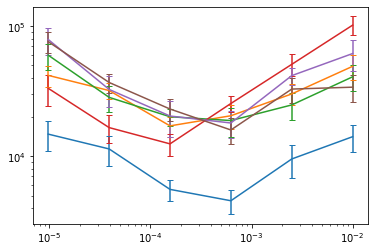

In [59]:

# plt.plot(t, err_ave)
for err, lab in zip([err_MEM, err_EM], ['MEM', 'EM']):
    err_ave = np.mean(err, axis = 0)
    err_err = stats.sem(err, axis = 0)
    for vcomp in range(3):
        plt.errorbar(t, err_ave[:, vcomp], yerr = err_err[:, vcomp], capsize = 3)
plt.xscale('log')
plt.yscale('log')

In [28]:
test = Coulomb(QE, QE, MI, MI, 200, 1E19, False, False, True)
num = 8
tTot = 0.01

In [29]:
vcomp = 0

0.01
0.0025
0.000625
0.00015625
3.90625e-05
9.765625e-06
2.44140625e-06
6.103515625e-07


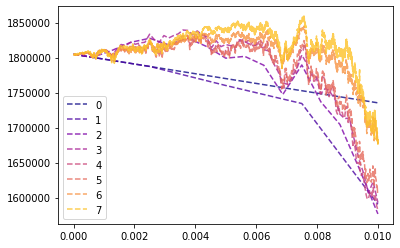

In [30]:
fig, ax = plt.subplots()
# timesteps = 2**np.array(range(num))
timesteps = np.array(range(num))
timesteps = timesteps / (np.max(timesteps)*1.15)
colors = pylab.cm.plasma(timesteps)


for l in range(num):
    dt = tTot / (4**l)
    print(dt)
    time, hist = test.beam_EM(17000, 10, dt, tTot, 10**(num+1), 
                               True, True)
    ax.plot(time, hist[:, 0, vcomp], '--', 
            alpha = 0.8, color = colors[l], label = l)
plt.legend()

[    0.  3326.  6653.  9980. 13307. 16301.]


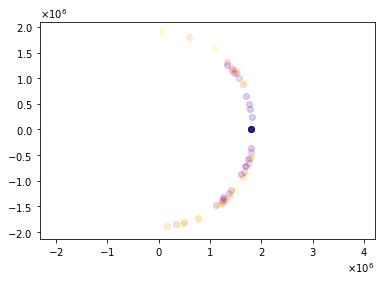

In [56]:
fig, ax = plt.subplots()
vSpaceSnaps(ax, hist, np.array([0, 0.02, 0.04, 0.06, 0.08, 0.098]), 0.0985)

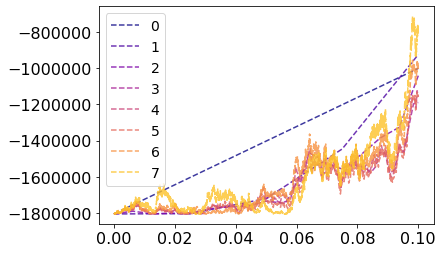

In [33]:
fig, ax = plt.subplots()
timesteps = np.array(range(num))
timesteps = timesteps / (np.max(timesteps)*1.15)
colors = pylab.cm.plasma(timesteps)


for l in range(num):
#     time, hist = test.beam_EM(17000, 10, tTot / (2**l), tTot, 10**(num+1), 
#                               True, True)
#     ax.plot(time, hist[:, 0, vcomp], '+--', 
#             alpha = 0.8, color = colors[l], label = l)
    
    time, hist = test.beam_MEM(17000, 10, tTot / (4**l), tTot, 10**(num+1), 
                              True)
    ax.plot(time, -hist[:, 0, vcomp], '--', 
            alpha = 0.8, color = colors[l],label = l)
plt.legend()

[    0.  3326.  6653.  9980. 13307. 16301.]


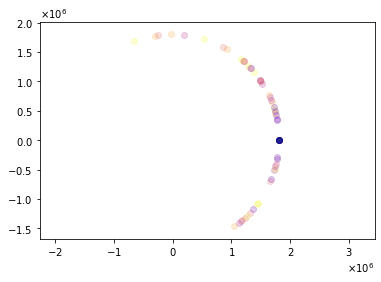

In [58]:
fig, ax = plt.subplots()
vSpaceSnaps(ax, hist, np.array([0, 0.02, 0.04, 0.06, 0.08, 0.098]), 0.0985)

In [10]:
test.wienerProcess(0.01, 4, True, 0.1)

array([[ 0.05823622, -0.04905877, -0.10933519],
       [ 0.04250836,  0.10541819, -0.09016786],
       [ 0.08959007,  0.13781782, -0.26043686],
       [-0.13088719, -0.00718729,  0.17810359],
       [-0.07519306,  0.02298329, -0.05189664],
       [ 0.01296826, -0.03426829, -0.09096584],
       [-0.05535269,  0.05288453,  0.0489954 ],
       [-0.11215844,  0.0551421 ,  0.10204832],
       [ 0.01523688,  0.07218067,  0.10892928],
       [ 0.01800154, -0.11813659, -0.08434531]])

In [11]:
test.wienerProcess(0.01, 4, False, 0.1)

array([[-0.04211741, -0.02722955, -0.15044821],
       [-0.08988705, -0.04535695, -0.09299446],
       [ 0.19114944,  0.00093135,  0.07140027],
       [ 0.0101037 , -0.05443649,  0.04718624]])

In [8]:
summ = np.sum(test.wiener[0 : 1000, :, :], axis = 0)

In [9]:
summ.shape

(10, 3)

In [3]:
moments = [1, 2, 3, 4]
dtList, momListEM = test.pitchConvergence(17000, 500, -3, -0.6, 1, 10, moments, 'EM', False, True)

In [35]:
moments = [1, 2, 3, 4]
dtListMEM, momListMEM = test.pitchConvergence(17000, 500, -3, 0, 1, 10, moments, 'MEM', False, True)

Text(0.5, 0, 'dt')

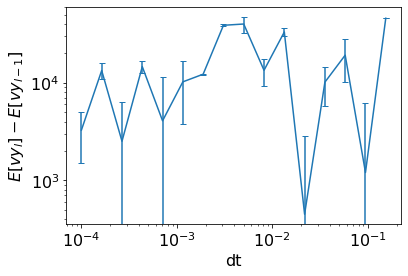

In [20]:
# aveMom = np.mean(momListEM, axis = 1)
# steMom = stats.sem(momListEM, axis = 1)

aveMom = np.abs(np.diff(np.mean(momListMEM, axis = 1), axis =0))
steMom = np.diff(stats.sem(momListMEM, axis = 1), axis = 0)

fig, ax = plt.subplots()
momIndex = 0
i = 1
ebar = ax.errorbar(dtList[1:], aveMom[:, momIndex, i], steMom[:, momIndex, i], 
                   capsize = 3)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$E[vy_l] - E[vy_{l-1}]$')
plt.xlabel('dt')

(11,) (11, 10, 4, 3)
(11, 4, 3)


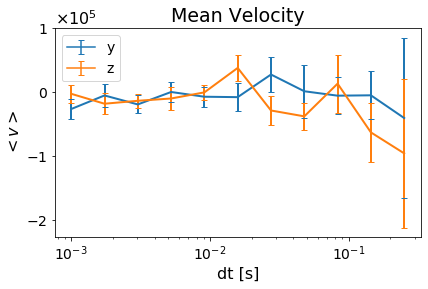

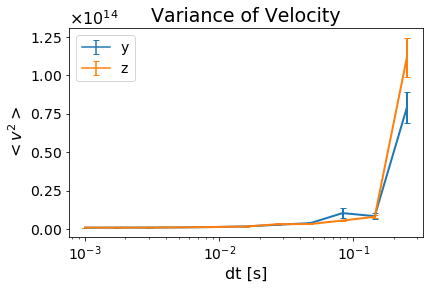

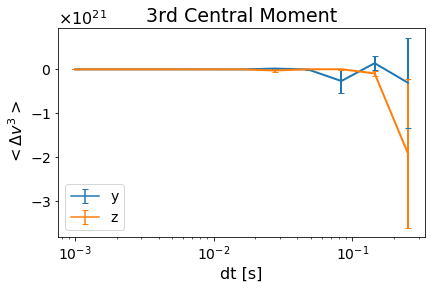

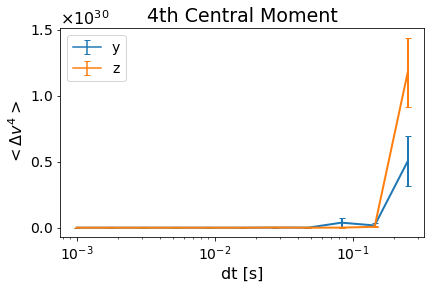

In [26]:
print(dtList.shape, momListEM.shape)
aveMom = np.mean(momListEM, axis = 1)
# steMom = np.std(momListEM, axis = 1)

steMom = stats.sem(momListEM, axis = 1)
print(aveMom.shape)
# print(dtList, aveMom)
# plt.plot(dtList, aveMom[:, 2, 0])


for momIndex, name in zip(moments, ['1st', '2nd', '3rd', '4th']):
    fig, ax = plt.subplots()
    lines = []
    momIndex = momIndex -1
    for i, lab in zip([1, 2], ['y', 'z']):
        ebar = ax.errorbar(dtList, aveMom[:, momIndex, i], steMom[:, momIndex, i], capsize = 3, label = lab)
        lines += ebar.lines
    plt.xscale('log')
#     plt.yscale('log')
    plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(-2, 0), useMathText=True)
    power =  str(moments[momIndex])
    if power == '1':
        ylabel = '$<v>$'
        title = 'Mean Velocity'
    elif power == '2':
        ylabel = '$<v^2>$'
        title = 'Variance of Velocity'
    else:
        ylabel = '$<\Delta v^{}>$'.format(power)
        title = name +' Central Moment'
    formatAndSave(fig, ax, lines, 'dt [s]', ylabel, fontsize = 16,
                  title = title,
#                  filename = name +'MomentEM.pdf',
                 )

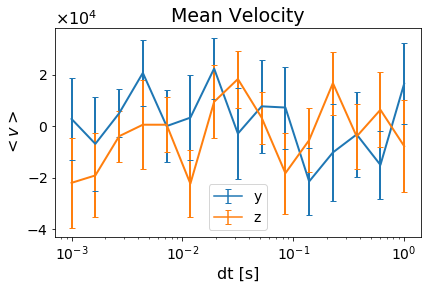

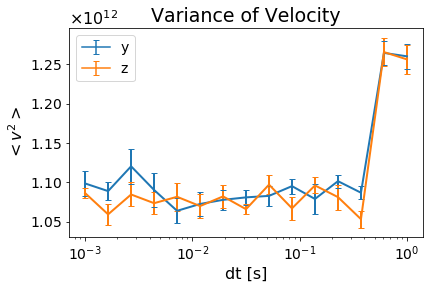

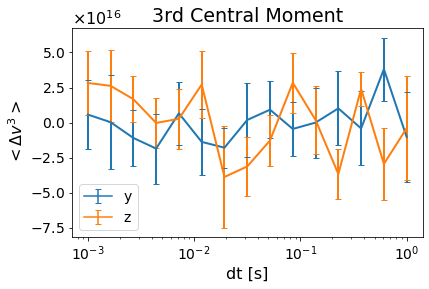

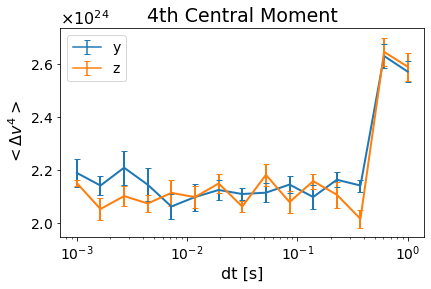

In [36]:
aveMom = np.mean(momListMEM, axis = 1)
steMom = stats.sem(momListMEM, axis = 1)

for momIndex, name in zip(moments, ['1st', '2nd', '3rd', '4th']):
    fig, ax = plt.subplots()
    lines = []
    momIndex = momIndex -1
    for i, lab in zip([1, 2], ['y', 'z']):
        ebar = ax.errorbar(dtListMEM, aveMom[:, momIndex, i], steMom[:, momIndex, i], capsize = 3, label = lab)
        lines += ebar.lines
    plt.xscale('log')
#     plt.yscale('log')
    plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(-2, 0), useMathText=True)
    power =  str(moments[momIndex])
    if power == '1':
        ylabel = '$<v>$'
        title = 'Mean Velocity'
    elif power == '2':
        ylabel = '$<v^2>$'
        title = 'Variance of Velocity'
    else:
        ylabel = '$<\Delta v^{}>$'.format(power)
        title = name +' Central Moment'
    formatAndSave(fig, ax, lines, 'dt [s]', ylabel, fontsize = 16,
                  title = title,
#                  filename = name +'MomentEM.pdf',
                 )

In [39]:
dtListMEM

array([1.        , 0.61054023, 0.37275937, 0.22758459, 0.13894955,
       0.08483429, 0.05179475, 0.03162278, 0.01930698, 0.01178769,
       0.00719686, 0.00439397, 0.0026827 , 0.00163789, 0.001     ])

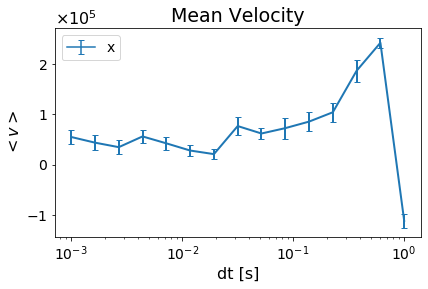

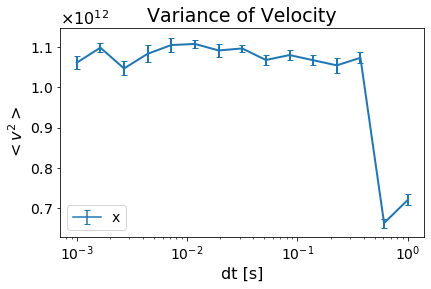

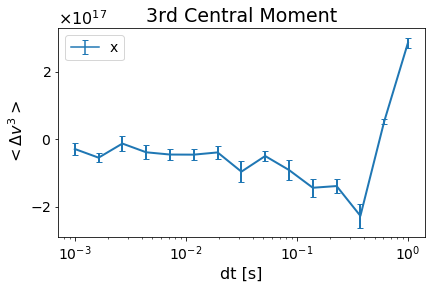

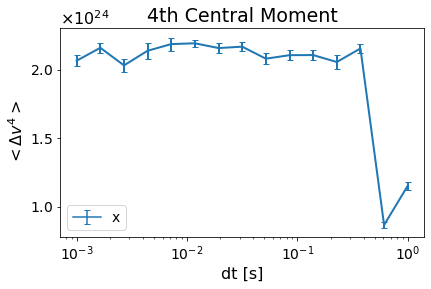

In [37]:
aveMom = np.mean(momListMEM, axis = 1)
steMom = stats.sem(momListMEM, axis = 1)

for momIndex, name in zip(moments, ['1st', '2nd', '3rd', '4th']):
    fig, ax = plt.subplots()
    lines = []
    momIndex = momIndex -1
    for i, lab in zip([0], ['x']):
        ebar = ax.errorbar(dtListMEM, aveMom[:, momIndex, i], steMom[:, momIndex, i], capsize = 3, label = lab)
        lines += ebar.lines
    plt.xscale('log')
#     plt.yscale('log')
    plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(-2, 0), useMathText=True)
    power =  str(moments[momIndex])
    if power == '1':
        ylabel = '$<v>$'
        title = 'Mean Velocity'
    elif power == '2':
        ylabel = '$<v^2>$'
        title = 'Variance of Velocity'
    else:
        ylabel = '$<\Delta v^{}>$'.format(power)
        title = name +' Central Moment'
    formatAndSave(fig, ax, lines, 'dt [s]', ylabel, fontsize = 16,
                  title = title,
#                  filename = name +'MomentEM.pdf',
                 )

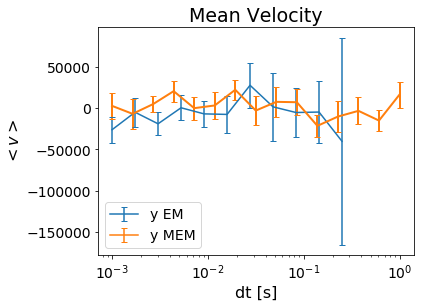

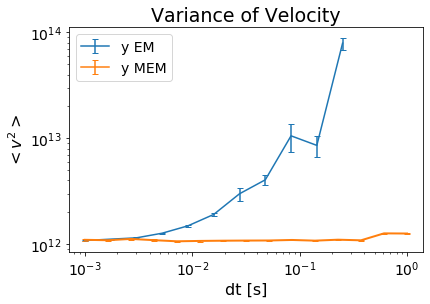

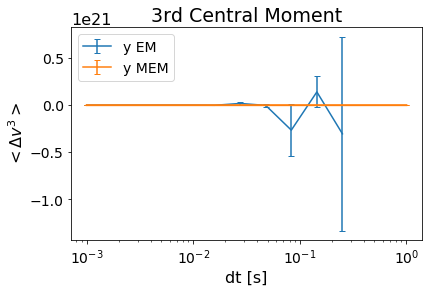

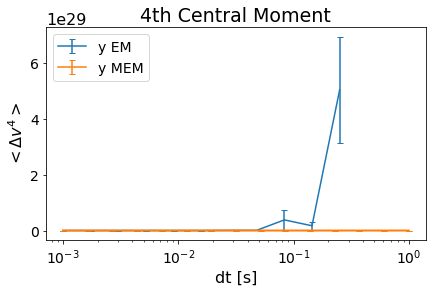

In [40]:

aveMomMEM = np.mean(momListMEM, axis = 1)
steMomMEM = stats.sem(momListMEM, axis = 1)

aveMomEM = np.mean(momListEM, axis = 1)
steMomEM = stats.sem(momListEM, axis = 1)



for momIndex, name in zip(moments, ['1st', '2nd', '3rd', '4th']):
    fig, ax = plt.subplots()
    lines = []
    momIndex = momIndex -1
    for i, lab in zip([1], ['y']):
        ebar = ax.errorbar(dtList, aveMomEM[:, momIndex, i], steMomEM[:, momIndex, i], capsize = 3, label = lab + ' EM')
        ebar = ax.errorbar(dtListMEM, aveMomMEM[:, momIndex, i], steMomMEM[:, momIndex, i], capsize = 3, label = lab + ' MEM')
        lines += ebar.lines
    plt.xscale('log')
#     plt.yscale('log')
#     plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(-2, 0), useMathText=True)
    power =  str(moments[momIndex])
    if power == '1':
        ylabel = '$<v>$'
        title = 'Mean Velocity'
    elif power == '2':
        ylabel = '$<v^2>$'
        title = 'Variance of Velocity'
        plt.yscale('log')
    else:
        ylabel = '$<\Delta v^{}>$'.format(power)
        title = name +' Central Moment'
    formatAndSave(fig, ax, lines, 'dt [s]', ylabel, fontsize = 16,
                  title = title,
#                  filename = name +'MomentEM.pdf',
                 )

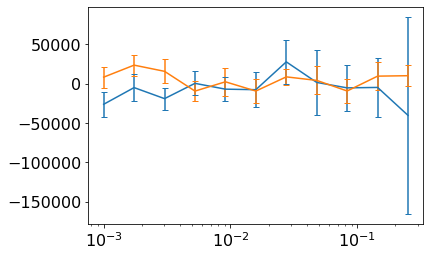

In [29]:
_, ax = plt.subplots()
ax.errorbar(dtList, aveMomEM[:, 0, 1], steMomEM[:, 0, 1], capsize = 3)
ax.errorbar(dtList, aveMomMEM[:, 0, 1], steMomMEM[:, 0, 1], capsize = 3)
plt.xscale('log')
# plt.yscale('log')